In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.core import Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from keras.utils import plot_model, to_categorical

Using TensorFlow backend.


In [2]:
df = pd.read_csv("FX_MA_100days.csv")
df.head()

,time,open,high,low,close,100mean,target
0,2017-03-22 06:00:00,111.725,111.791,110.731,111.155,113.16507,1
1,2017-03-23 06:00:00,111.150,111.578,110.628,110.930,113.23285,1
2,2017-03-24 06:00:00,110.934,111.485,110.626,111.321,113.31300,1
3,2017-03-27 06:00:00,110.926,111.054,110.114,110.669,113.38991,1
4,2017-03-28 06:00:00,110.652,111.202,110.182,111.140,113.47005,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 7 columns):
time       694 non-null object
open       694 non-null float64
high       694 non-null float64
low        694 non-null float64
close      694 non-null float64
100mean    694 non-null float64
target     694 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 38.1+ KB


In [4]:
split_data = '2019-05-06 06:00:00'
train, test = df[df['time'] < split_data], df[df['time'] >= split_data]

In [5]:
train = train.set_index('time')
test = test.set_index('time')

In [6]:
X_train = train.iloc[:,:5]
Y_train = train['target']

X_test = test.iloc[:,:5]
Y_test = test['target']

In [7]:
X_train = X_train.as_matrix()
print(X_train)
print("Data len: ",len(X_train))

X_test = X_test.as_matrix()
print(X_train)
print("Data len: ",len(X_test))

# 正規化
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)

ms = MinMaxScaler()
X_test = ms.fit_transform(X_test)

[[111.725   111.791   110.731   111.155   113.16507]
 [111.15    111.578   110.628   110.93    113.23285]
 [110.934   111.485   110.626   111.321   113.313  ]
 ...
 [111.425   111.613   111.05    111.385   110.681  ]
 [111.382   111.666   111.354   111.51    110.6622 ]
 [111.518   111.695   111.07    111.096   110.64482]]
Data len:  555
[[111.725   111.791   110.731   111.155   113.16507]
 [111.15    111.578   110.628   110.93    113.23285]
 [110.934   111.485   110.626   111.321   113.313  ]
 ...
 [111.425   111.613   111.05    111.385   110.681  ]
 [111.382   111.666   111.354   111.51    110.6622 ]
 [111.518   111.695   111.07    111.096   110.64482]]
Data len:  139


/home/tim0114gap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/tim0114gap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [8]:
c = np.array(Y_train)
print("Y_train Target len: ",len(Y_train))

Y_test = np.array(Y_test)
print("Y_train Target len: ",len(Y_test))

Y_train Target len:  555
Y_train Target len:  139


In [9]:
maxlen = 100
dataTrain = []
targetTrain = []
for i in range(0, len(X_train) - maxlen):
    dataTrain.append(X_train[i: i + maxlen])
    targetTrain.append(Y_train[i + maxlen])

dataTest = []
targetTest = []
for i in range(0, len(X_test) - maxlen):
    dataTest.append(X_test[i: i + maxlen])
    targetTest.append(Y_test[i + maxlen])

In [10]:
X_train = np.array(dataTrain)
Y_train = np.array(targetTrain)

X_test = np.array(dataTest)
Y_test = np.array(targetTest)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(455, 100, 5)
(455,)
(39, 100, 5)
(39,)


In [11]:
# Y_train = Y_train.reshape(len(Y_train), 1)
# Y_test = Y_test.reshape(len(Y_test), 1)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [12]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(455, 100, 5)
(455, 2)
(39, 100, 5)
(39, 2)


In [13]:
'''
モデル設定
'''
length_of_sequence = X_train.shape[1]  # 入力層
in_out_neurons = 2                     # 出力層 
n_hidden = 100                         # 隠れ層 

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, 5), return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(50))
model.add(Activation("sigmoid"))
model.add(Dense(in_out_neurons))
model.add(Activation("softmax"))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model.compile(loss="categorical_crossentropy", 
              optimizer=optimizer, metrics=['acc'])

In [15]:
#plot_model(model, to_file='model.png')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               42400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 47,552
Trainable params: 47,552
Non-trainable params: 0
_________________________________________________________________


In [16]:
# コールバック指定（https://qiita.com/yukiB/items/f45f0f71bc9739830002）
early_stopping = EarlyStopping(monitor='val_loss', 
                               mode='auto', patience=20)
history = model.fit(X_train, Y_train,
                  batch_size = 16, # 論文で使われるのが1, 32, 128, 256, 512
                  epochs=200,
                  validation_split=0.2,
                  callbacks=[early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 364 samples, validate on 91 samples
Epoch 1/200
364/364 [==============================] - 4s 11ms/step - loss: 0.6586 - acc: 0.6044 - val_loss: 0.6242 - val_acc: 0.7473
Epoch 2/200
364/364 [==============================] - 3s 8ms/step - loss: 0.5655 - acc: 0.7775 - val_loss: 0.9230 - val_acc: 0.2198
Epoch 3/200
364/364 [==============================] - 3s 8ms/step - loss: 0.5368 - acc: 0.7692 - val_loss: 0.6883 - val_acc: 0.4835
Epoch 4/200
364/364 [==============================] - 3s 8ms/step - loss: 0.4356 - acc: 0.8242 - val_loss: 0.7465 - val_acc: 0.4725
Epoch 5/200
364/364 [==============================] - 3s 8ms/step - loss: 0.3948 - acc: 0.8544 - val_loss: 0.7731 - val_acc: 0.5165
Epoch 6/200
364/364 [==============================] - 3s 8ms/step - loss: 0.3241 - acc: 0.8956 - val_loss: 0.4426 - val_acc: 0.8022
Epoch 7/200
364/364 [==============================] - 3s 8ms/

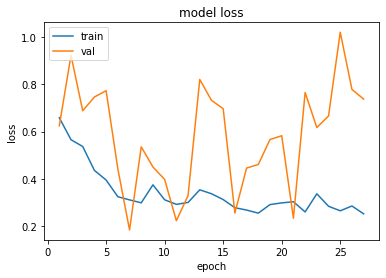

In [17]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

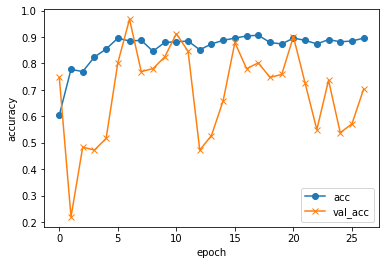

In [18]:
#acc, val_accのプロット
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
#Final.pngという名前で、結果を保存
# plt.savefig('Final.png')
# plt.show()

In [19]:
print("Test accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

39/39 [==============================] - 0s 2ms/step
Test accuracy: 0.8718


In [20]:
predict_classes = model.predict_classes(X_test)

In [21]:
Y_test = np.array([np.argmax(x) for x in Y_test])

In [22]:
pd.crosstab(Y_test, predict_classes, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,28,1,29
1,4,6,10
All,32,7,39
